# The best rank $k$ approximation of a matrix.

The best rank-k approximation of a matrix is a matrix of rank k that is closest to the original matrix in terms of a specified matrix norm. This concept is closely related to the concept of matrix factorization and is commonly used in various numerical linear algebra and data analysis tasks, such as Principal Component Analysis (PCA).

###  (*) A fact from linear algebra: 

Let $\vec{u\in \mathbb{R^m}}$ and $\vec{v} \in \mathbb{R^n}$. Show that $\vec{u}\vec{v}^T$ is an $mxn$ matrix of rank $1$.

_Hint_: First show that $rank (AB) \leq rank(A)$ by showing that $col(AB) \subset col(A)$. 

Given a matrix $A$, how do you decompose it into the sum of some matrices of the same size but with lower rank?

__Example 1__ Write $\begin{bmatrix} 1 & 2\\ 3 & 4   \end{bmatrix}$ as the sum of matrices of rank $1$.



As you can check, there are many ways to do so. One popular way to it is using SVD. Recll that The SVD of an $mxn$ matrix A of rank r is given by:

$A = U\Sigma V^T$.

Where:
- $U = [ U_1\dots U_m]$  is an m × m orthogonal matrix.
- $\Sigma$ is an m × n diagonal matrix with singular values $\sigma_1 \geq \sigma_2 \geq \dots \sigma_r \geq 0$ in decreasing order on the diagonal.
- $V = [V_1 \dots V_n]$ is an n × n orthogonal matrix.


Then we can write: 

$$
A = \sigma_1 U_1 V_1^T + \sigma_2 U_2 V_2^T + \dots + \sigma_r U_r V_r^T
$$

Each term in above sum is of rank one by (*)

The way the SVD decompose a matrix, is special. SVD provides a way to find the best approximation of the matrix $A$ with a matrix of a smaller rank. The choice of "best" depends on the specific matrix norm you're using. Recall that a norm is function that allows you to compare two objects. 

The Frobenius norm, denoted as $\|.\|_F$, is defined as the square root of the sum of the absolute squares of its elements. Formally, for an m x n matrix $A = [a_{ij}]$, the Frobenius norm is calculated as follows:

$$\|A\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2}$$

Here's an example in Python and NumPy to calculate the Frobenius norm of a matrix in a Jupyter Notebook:

In [2]:
import numpy as np

# Define a matrix
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Calculate the Frobenius norm
frobenius_norm = np.linalg.norm(A, 'fro')

print(f"Frobenius norm of matrix A: {frobenius_norm}")

Frobenius norm of matrix A: 16.881943016134134


To find the best rank-k approximation $A_k$, you can set all singular values beyond the k-th largest singular value to zero and then reconstruct A_k as follows:

$$
A_k = \sigma_1 U_1 V_1^T + \sigma_2 U_2 V_2^T + \dots + \sigma_k U_k V_r^T \quad k\leq r (**)
$$


$A_k$ is the best rank-k approximation of $A$ in the sense that the distance between A and A_k with respect to the Frobenius norm is less than the distance between $A$ and any other matrix of rank $k$.


__Theorem (Eckart-Young-Mirksy)__ 

For any matrix B of rank $k (k\leq r)$, we have 
$$
 \leq \|A-A_k\|_F \leq \|A-B\|_F
$$

Moreover, $\|A-A_k\|_F = \sigma_k$

This approximation can be useful for dimensionality reduction, noise reduction, and various other applications in linear algebra, machine learning, and data analysis.

#### Application in image processing:

__Image Processing__

We use `PIL` (Python Imaging Library). It has been succeeded by the `Pillow` library, which is a more actively maintained and user-friendly fork of PIL. To work with images using `Pillow`, you should install itr first:


In [7]:
pip install Pillow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


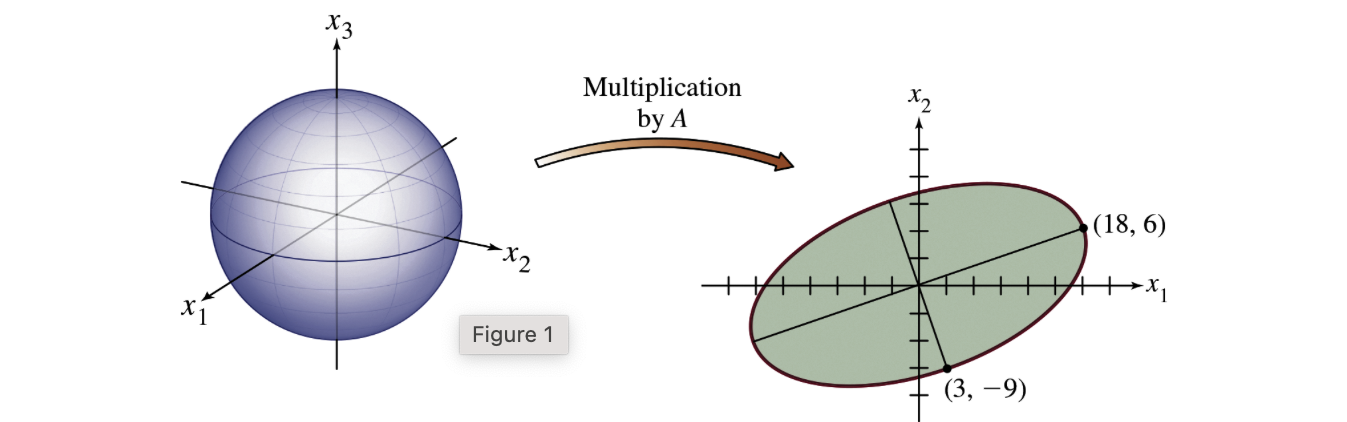

In [16]:
# needed libraries
import matplotlib.pyplot as plt
import numpy as np
import time

# lets open a picture. Use whatever you want.
from PIL import Image

image = Image.open('1.png')
image

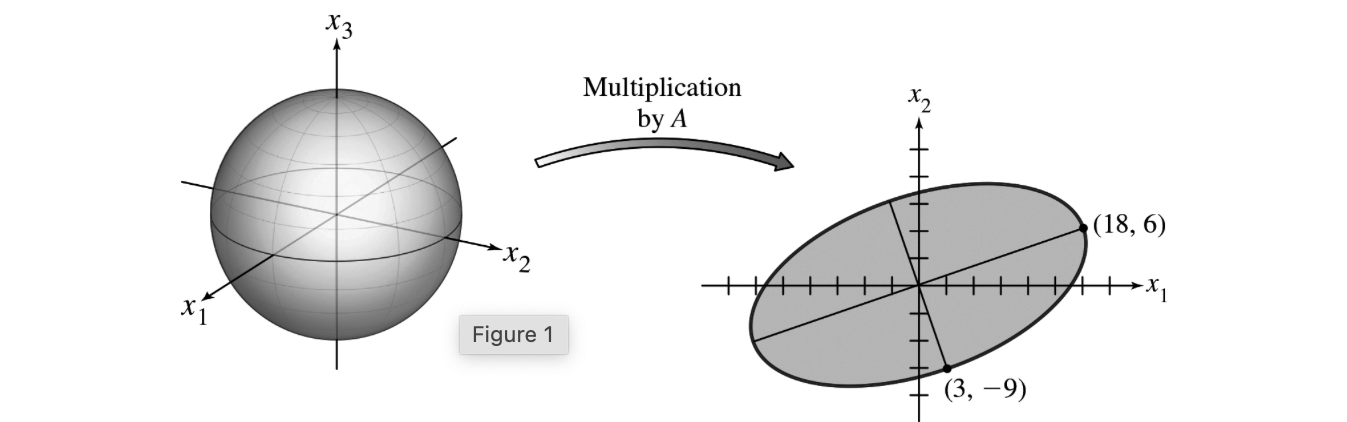

In [22]:
#convert the picture to grayscales 
image_gray = img.convert('LA') ##'LA' stands for "Luminance-Alpha; use  ChatGPT to learn more about this
image_gray                        

Now lets convert the image into a matrix and output the image again

In [28]:
# This line extracts the pixel data from a grayscale image as a list
image_matrix = np.array(list(image_gray.getdata(band=0)), float)  #use ChatGPT to underestand this line better

# ensure that the shape of the array matches the image's dimensions. 
image_matrix.shape = (image_gray.size[1], image_gray.size[0])

# converts the image_matrix from a NumPy array to a NumPy matrix for processing.
image_matrix = np.matrix(image_matrix)

In [32]:
# here is the result:
image_matrix

matrix([[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]])

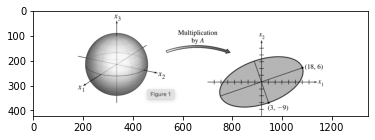

In [33]:
# lets see if this gives us back the original image:
plt.imshow(image_matrix, cmap='gray')  # 'cmap' specifies the colormap (grayscale)

How can you use SVD to get a rough image of the original image?

In [46]:
# computing SVD
U, sigma, V = np.linalg.svd(image_matrix)

In [50]:
# What are U and sigma and V?


(422,)

In [67]:
# what is the rank of our image?
sigma.shape[0]
U.shape[0]
V.shape[0]

1347

In [ ]:
# what is the maximum singular value?

In [ ]:
# what is the minimum singular value?

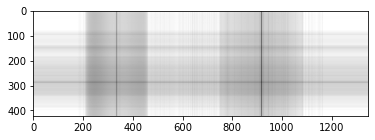

In [47]:
# Lets find A_1 using formula (**)
image_1 = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(image_1, cmap='gray');

In [48]:
# you code
# Find A_2

In [49]:
#you code

#Write a for loop that computes A_5, A_10, A_15, and A_20 using (**).   

When using Singular Value Decomposition (SVD) in Python, we often deal with three matrices $(U, \Sigma, and V)$ that can take up a lot of memory. However, if you only need an approximate version of your data and not all the details, you can store fewer numbers. The number of numbers you need to store depends on the level of detail (rank "k") you want to preserve in the approximation.

Can you tell how many numbers do you need to save for $A_k$